# Two Body Problem Relative to an Inertial Frame

Solves the inertial two-body problem in three dimensions using the RKF4(5) method.

### Import libraries and modules

In [1]:
import numpy as np
from sympy.physics.mechanics import dynamicsymbols
from scipy.integrate import solve_ivp
import numpy.linalg as linalg
import matplotlib.pyplot as plt

### Set up initial conditions

In [2]:
G = 6.67259e-20 # Gravitational constant

mass = np.array([1e26, 1e26])

R1_0 = np.array([0, 0, 0])
R2_0 = np.array([3000, 0, 0])
V1_0 = np.array([10, 20, 30])
V2_0 = np.array([0, 40, 0])

y0 = np.concatenate((R1_0, R2_0, V1_0, V2_0))

tspan = (0, 480)

### Main function

In [3]:
def two_body(y0, tspan):
    
    def ode_func(t, y):
        # Position vectors of m1 and m2
        R1 = y[:3]
        R2 = y[3:6]
    
        # Velocity vectors of m1 and m2
        V1 = y[6:9]
        V2 = y[9:]
    
        # Acceleration vectors of m1 and m2
        r = linalg.norm(R2-R1)
        A1 = G*mass[1]*(R2-R1)/(r**3)
        A2 = G*mass[0]*(R1-R2)/(r**3)
    
        # Return input for RKF4(5) method
        dydt = np.concatenate((V1, V2, A1, A2))
        return dydt
    
    sol = solve_ivp(ode_func, tspan, y0, method="RK45", max_step=1)
    return sol

### Run and plot function

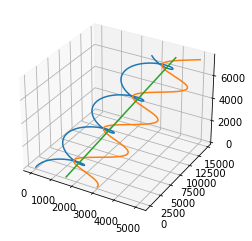

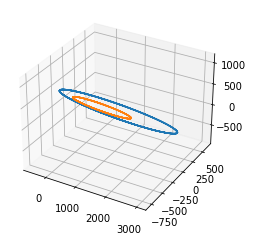

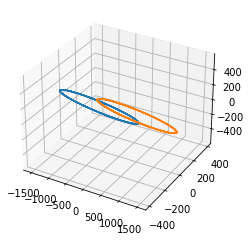

In [4]:
sol = two_body(y0, tspan)

# Find position vectors
X1 = sol.y[0]
Y1 = sol.y[1]
Z1 = sol.y[2]
X2 = sol.y[3]
Y2 = sol.y[4]
Z2 = sol.y[5]

# Find centre of mass
G_X = (mass[0]*X1 + mass[1]*X2)/(mass[0] + mass[1])
G_Y = (mass[0]*Y1 + mass[1]*Y2)/(mass[0] + mass[1])
G_Z = (mass[0]*Z1 + mass[1]*Z2)/(mass[0] + mass[1])

# Plot from different reference frames
%matplotlib inline
fig = plt.figure("Motion Relative to Inertial Frame")
ax1 = fig.add_subplot(projection='3d')
ax1.plot(X1, Y1, Z1)
ax1.plot(X2, Y2, Z2)
ax1.plot(G_X, G_Y, G_Z)

fig = plt.figure("Motion of M2 and G Relative to M1")
ax2 = fig.add_subplot(projection='3d')
ax2.plot(X2 - X1, Y2 - Y1, Z2- Z1)
ax2.plot(G_X - X1, G_Y - Y1, G_Z - Z1)

fig = plt.figure("Motion of M1 and M2 Relative to G")
ax3 = fig.add_subplot(projection='3d')
ax3.plot(X1 - G_X, Y1 - G_Y, Z1 - G_Z)
ax3.plot(X2 - G_X, Y2 - G_Y, Z2 - G_Z)